<a href="https://colab.research.google.com/github/vaibhav2903/deepfakeDetection/blob/main/XAI_Deepfake_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive/')
file_path_X = '/content/drive/MyDrive/X_data.npy'
np_data_X = np.load(file_path_X)

Mounted at /content/drive/


In [ ]:
import numpy as np
file_path_Y = '/content/drive/MyDrive/Y_data.npy'
np_data_Y = np.load(file_path_Y)

In [ ]:
np_data_X_subset1 = np_data_X[:7000]
np_data_Y_subset1 = np_data_Y[:7000]
np_data_X_subset2 = np_data_X[7001:13000]
np_data_Y_subset2 = np_data_Y[7001:13000]
np_data_X_subset3 = np_data_X[13001:]
np_data_Y_subset3 = np_data_Y[13001:]

In [ ]:
# Concatenate vertically (along rows)
concatenated_vertical_X = np.concatenate((np_data_X_subset1, np_data_X_subset3), axis=0)
concatenated_vertical_Y = np.concatenate((np_data_Y_subset1, np_data_Y_subset3), axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(concatenated_vertical_X, concatenated_vertical_Y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.models import load_model
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
# tf.compat.v1.disable_eager_execution()

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(features_train, labels_train, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
266/266 [==============================] - 21s 43ms/step - loss: 0.4617 - accuracy: 0.8196 - val_loss: 0.4518 - val_accuracy: 0.8005
Epoch 2/10
266/266 [==============================] - 9s 32ms/step - loss: 0.2628 - accuracy: 0.8958 - val_loss: 0.2212 - val_accuracy: 0.9144
Epoch 3/10
266/266 [==============================] - 11s 40ms/step - loss: 0.1894 - accuracy: 0.9287 - val_loss: 0.3119 - val_accuracy: 0.8649
Epoch 4/10
266/266 [==============================] - 10s 37ms/step - loss: 0.1597 - accuracy: 0.9409 - val_loss: 0.1920 - val_accuracy: 0.9271
Epoch 5/10
266/266 [==============================] - 9s 35ms/step - loss: 0.1231 - accuracy: 0.9532 - val_loss: 0.1835 - val_accuracy: 0.9360
Epoch 6/10
266/266 [==============================] - 9s 32ms/step - loss: 0.1104 - accuracy: 0.9602 - val_loss: 0.1834 - val_accuracy: 0.9374
Epoch 7/10
266/266 [==============================] - 9s 33ms/step - loss: 0.1120 - accuracy: 0.9615 - val_loss: 0.2420 - val_accuracy: 0.9

In [ ]:
import keras
model = keras.models.load_model('/content/drive/MyDrive/my_cnn_model1.h5')

In [ ]:
# model.save('/content/drive/MyDrive/my_cnn_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the model
predictions_prob = model.predict(features_test)
predictions = (predictions_prob > 0.5).astype("int32")

83/83 [==============================] - 1s 10ms/step


In [ ]:
import numpy as np

# Ensure predictions and labels_test are flattened to one-dimensional arrays
predictions_flat = predictions.flatten()
labels_test_flat = labels_test.flatten()

# Now find indices of false positives
false_positives_indices = np.where((predictions_flat == 1) & (labels_test_flat == 1))[0]

In [ ]:
false_positives_indices

array([   0,    1,    3, ..., 3846, 3847, 3853])

array([[[ 10,   9,  13],
        [ 10,   9,  13],
        [ 10,   9,  13],
        ...,
        [152, 141, 146],
        [150, 137, 139],
        [156, 144, 144]],

       [[ 10,   9,  13],
        [ 10,   9,  13],
        [ 10,   9,  13],
        ...,
        [147, 135, 140],
        [148, 135, 138],
        [157, 143, 146]],

       [[ 10,   9,  13],
        [ 10,   9,  13],
        [ 10,   9,  13],
        ...,
        [141, 129, 135],
        [147, 134, 138],
        [157, 144, 146]],

       ...,

       [[ 15,  13,  13],
        [ 13,  12,  12],
        [ 13,  12,  12],
        ...,
        [252, 243, 253],
        [253, 243, 252],
        [252, 241, 251]],

       [[ 14,  12,  12],
        [ 13,  11,  11],
        [ 13,  11,  11],
        ...,
        [252, 244, 253],
        [254, 245, 254],
        [253, 242, 252]],

       [[ 15,  13,  14],
        [ 13,  11,  11],
        [ 14,  12,  12],
        ...,
        [252, 243, 250],
        [253, 243, 252],
        [251, 241, 251]]], dtype=uint8)
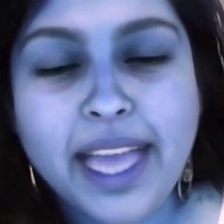

In [ ]:
features_test[2000]

In [ ]:
labels_test[2000]

1

In [ ]:
f1 = f1_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")

F1 Score: 0.9497568881685576
Precision: 0.9598689598689598


In [ ]:
# Evaluate the model
predictions_prob_new = model.predict(np_data_X_subset2)
predictions_new = (predictions_prob_new > 0.5).astype("int32")

188/188 [==============================] - 2s 11ms/step


In [ ]:
f1 = f1_score(np_data_Y_subset2, predictions_new)
precision = precision_score(np_data_Y_subset2, predictions_new)

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")

F1 Score: 0.8545764286820504
Precision: 0.8857142857142857


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, predictions)

print(cm)

NameError: name 'labels_test' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(labels_test, predictions_prob)
roc_auc = roc_auc_score(labels_test, predictions_prob)

In [ ]:
roc_auc

0.9198508249546773

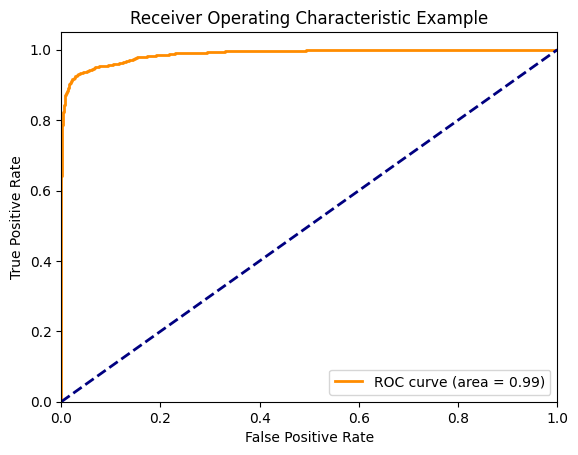

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

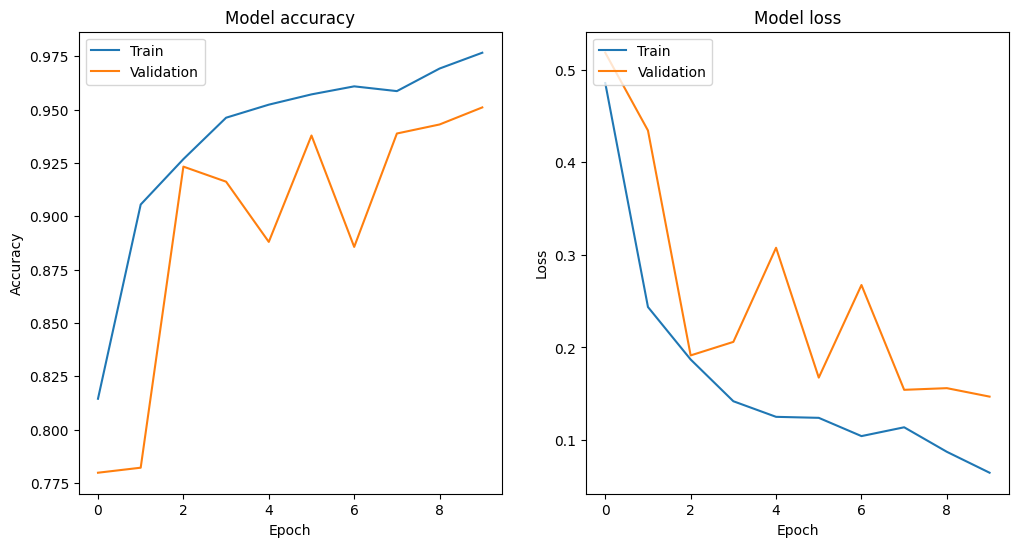

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
#model.save('/content/drive/MyDrive/my_cnn_model.h5')
np_data_Y[1119]

0

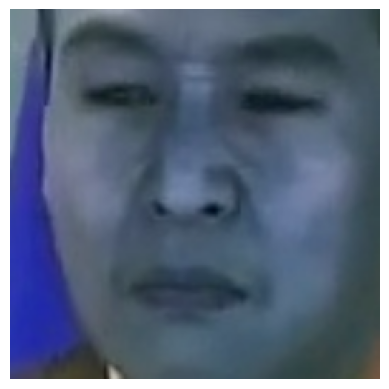

In [ ]:
plt.imshow(np_data_X[10001])
plt.axis('off')  # to turn off axis labels
plt.show()

In [ ]:
# # Function to generate textual explanation using LIME
# def generate_textual_explanation(img_array, model, explainer):
#     explanation_instance = explainer.explain_instance(img_array, model.predict, top_labels=1, hide_color=0, num_samples=100)
#     explanation_text = explanation_instance.get_image_and_mask(explanation_instance.top_labels[0], positive_only=False, num_features=10, hide_rest=False)[0]
#     return explanation_text

In [ ]:
from lime.wrappers.scikit_image import SegmentationAlgorithm

# Function to generate textual explanation using LIME
def generate_textual_explanation(img_array, model, explainer, num_samples=1000, num_features=10, hide_color=0):
    # Define a segmentation algorithm
    segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=4, max_dist=200, ratio=0.2)

    # Generate the explanation for the instance
    explanation_instance = explainer.explain_instance(
        img_array,
        classifier_fn=model.predict,
        top_labels=1,
        hide_color=hide_color,
        num_samples=num_samples,
        segmentation_fn=segmentation_fn
    )

    # Get the image and mask of the explanation
    image, mask = explanation_instance.get_image_and_mask(
        explanation_instance.top_labels[0],
        positive_only=False,
        num_features=num_features,
        hide_rest=False
    )

    return image, mask


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=d5861a47a03cdc407876f3b11370fb5ce3477fe8fb50618c387aec83bb7eff47
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


1/1 [==============================] - 0s 25ms/step
Predicted Class Label: 1


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


TypeError: Invalid shape (1, 224, 224, 3) for image data

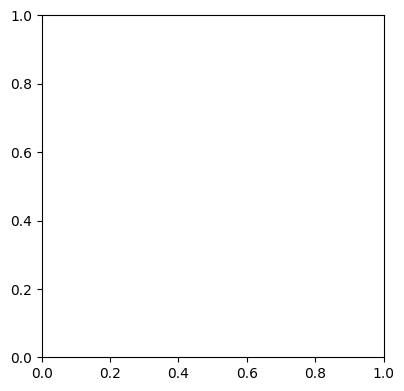

In [ ]:
#####THis is old

from tensorflow.keras.models import load_model
from lime.lime_image import LimeImageExplainer
class_labels = [0,1]

predictions_per_val = model.predict(features_test[3846:3847])

predicted_indices = (predictions_per_val > 0.5).astype("int32")
predictions_indices = predicted_indices.flatten()
#predicted_indices = np.argmax(predictions_per_val, axis=1)
predicted_class_label = class_labels[predictions_indices[0]]
print(f"Predicted Class Label: {predicted_class_label}")
explanation = f"Predicted class: {predicted_class_label}"



explainer = LimeImageExplainer()
explanation_text = generate_textual_explanation(features_test[2000], model, explainer)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(features_test[3846:3847])
plt.title(f"Original Image")
plt.subplot(1, 3, 2)
plt.imshow(explanation_text[0], cmap='jet', alpha=0.8)
plt.title("LIME Explanation")
plt.show()

print(explanation)
print("LIME Textual Explanation: ", explanation_text)

1/1 [==============================] - 0s 40ms/step
Predicted Class Label: 1
Actual Class Label: [1]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


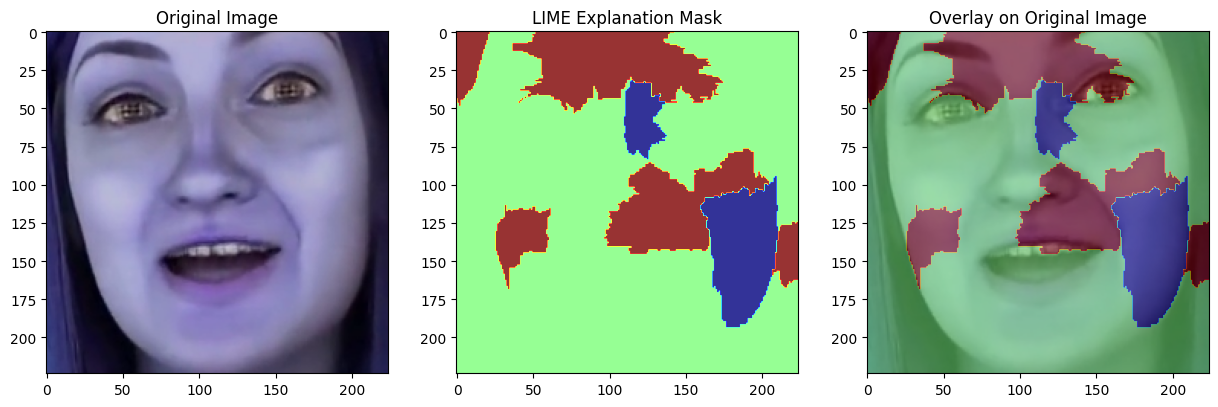

Predicted class: 1


In [ ]:
class_labels = [0, 1]

predictions_per_val = model.predict(features_test[3846:3847])

predicted_indices = (predictions_per_val > 0.5).astype("int32")
predictions_indices = predicted_indices.flatten()
print(f"Predicted Class Label: {predicted_class_label}")
print(f"Actual Class Label: {labels_test[3846:3847]}")

explainer = LimeImageExplainer()
explanation_image, explanation_mask = generate_textual_explanation(features_test[3846], model, explainer)

# Plot the original image, the explanation mask, and the overlay of the mask on the image
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(features_test[3846])
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(explanation_mask, cmap='jet', alpha=0.8)
plt.title("LIME Explanation Mask")

plt.subplot(1, 3, 3)
plt.imshow(features_test[3846])
plt.imshow(explanation_mask, cmap='jet', alpha=0.5)  # Overlay the mask with some transparency
plt.title("Overlay on Original Image")
plt.show()

print(f"Predicted class: {predicted_class_label}")

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.4 MB/s eta 0:00:00


In [ ]:
# import shap

In [ ]:
# background = np_data_X[np.random.choice(np_data_X.shape[0], 10, replace=False)]
# explainer = shap.DeepExplainer(model, background)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [ ]:



# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(model, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(
    X[1:3], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)

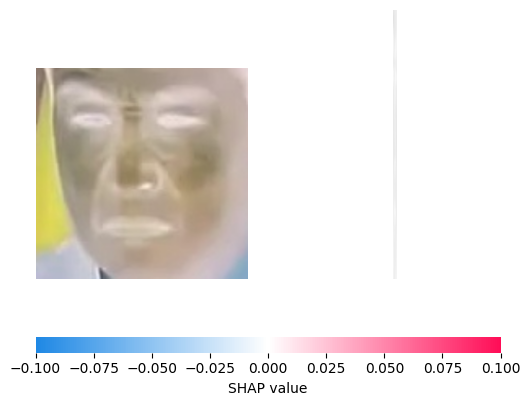

In [ ]:
import shap
import numpy as np
from tensorflow.keras import models

# Assuming you have your model defined as 'model'
# and your data loaded into 'X_train'

# Load the model if it's not loaded
# model = models.load_model('your_model_path.h5')

# It is important to pass a batch of data where you want to explain the model's output.
# Here we use a sample from the training set.
X_sample = np_data_X[10000:10001]  # Adjust the sample size as needed

# Create a SHAP explainer object
explainer = shap.GradientExplainer(model, X_sample)

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# Visualize the explanation for the first prediction
shap.image_plot(shap_values[0], -X_sample)

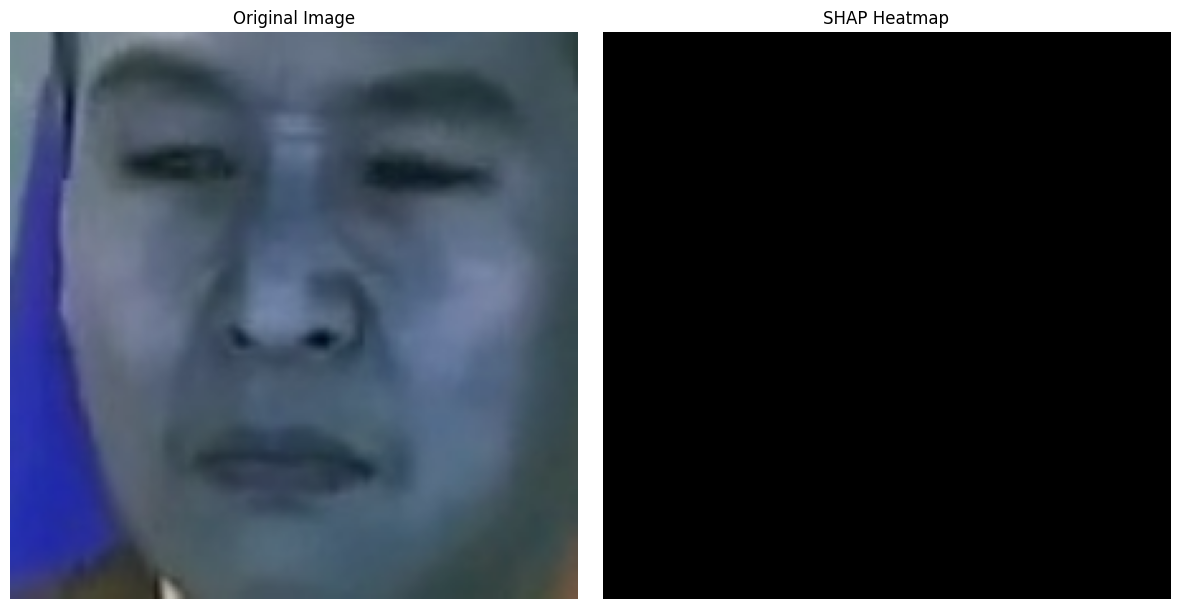

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_sample contains your image data and shap_values are already computed

# For demonstration, let's assume X_sample and shap_values are as follows:
# X_sample = np.random.rand(224, 224, 3)  # Your actual image data here
# shap_values = np.random.rand(224, 224, 3)  # Your actual SHAP values here

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with two subplots side by side

# Original image on the left
axs[0].imshow(X_sample[0])  # Assuming X_sample[0] is the image we are interested in
axs[0].axis('off')  # Remove axes from the image
axs[0].set_title('Original Image')

# SHAP heatmap on the right
# Convert SHAP values to a format suitable for displaying if necessary
# For example, taking the absolute value and summing across the color channels if it's a color image
shap_heatmap = np.sum(np.abs(shap_values[0]), axis=-1)  # Sum across the color channels
axs[1].imshow(shap_heatmap, cmap='viridis')  # Using 'viridis' colormap for the heatmap
axs[1].axis('off')
axs[1].set_title('SHAP Heatmap')

plt.tight_layout()  # Adjust subplots to give some space between them
plt.show()

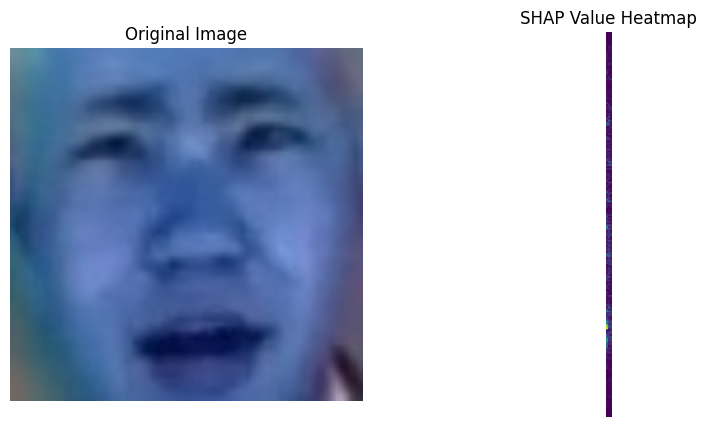

In [ ]:
import shap
import numpy as np
from tensorflow.keras import models
import matplotlib.pyplot as plt

# Assuming you have your model defined as 'model'
# and your data loaded into 'X_train'

# Use a single image sample for the explanation
X_sample = np_data_X[14000:14031]  # Select only one image

# Create a SHAP explainer object
explainer = shap.GradientExplainer(model, X_sample)

# Compute SHAP values for the selected image
shap_values = explainer.shap_values(X_sample)

# Visualize the explanation for the selected image
# shap.image_plot(shap_values[0], -X_sample)  # Original code for reference

# For horizontal plotting, we use matplotlib
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(X_sample[0])
axs[0].axis('off')
axs[0].set_title('Original Image')

# SHAP value image (ensure to use the absolute value for visualization)
shap_image = np.abs(shap_values[0][0])  # Use absolute values for better visualization
axs[1].imshow(shap_image)
axs[1].axis('off')
axs[1].set_title('SHAP Value Heatmap')

plt.show()

In [ ]:
-X_sample

array([[[[140, 120, 109],
         [138, 118, 107],
         [134, 114, 103],
         ...,
         [230, 214, 215],
         [233, 217, 218],
         [234, 218, 219]],

        [[141, 121, 110],
         [139, 119, 108],
         [136, 116, 105],
         ...,
         [230, 214, 215],
         [232, 216, 217],
         [233, 217, 218]],

        [[142, 122, 111],
         [140, 120, 109],
         [138, 118, 107],
         ...,
         [228, 212, 213],
         [231, 215, 216],
         [232, 216, 217]],

        ...,

        [[188, 188, 212],
         [188, 188, 212],
         [187, 187, 211],
         ...,
         [134, 168, 197],
         [133, 167, 197],
         [133, 167, 196]],

        [[188, 188, 210],
         [187, 188, 210],
         [187, 188, 210],
         ...,
         [134, 168, 197],
         [134, 167, 196],
         [133, 167, 196]],

        [[187, 188, 209],
         [187, 188, 209],
         [187, 188, 209],
         ...,
         [134, 168, 197],
        

In [ ]:
#shap.image_plot(shap_values[0], X_test[0])

In [ ]:
# X_test = features_test[1:10]

In [ ]:
# explainer = shap.GradientExplainer(model, X_test)

In [ ]:
# shap_values = explainer.shap_values(X_test)

In [ ]:
# shap.image_plot(shap_values[0], -X_test[0])

In [ ]:
# shap_vals= e.shap_values(np_data_X[1:10])

In [ ]:
image = np_data_X[14000]
image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
image_tensor = tf.expand_dims(image_tensor, axis=0)

with tf.GradientTape() as tape:
    tape.watch(image_tensor)
    predictions = model(image_tensor)

    class_idx = 0  # or use np.argmax(predictions[0]) for multi-class
    output_to_explain = predictions[:, 0]

In [ ]:
output_to_explain

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9243412], dtype=float32)>

In [ ]:
gradients = tape.gradient(output_to_explain, image_tensor)

In [ ]:
np_data_Y[11119]

1

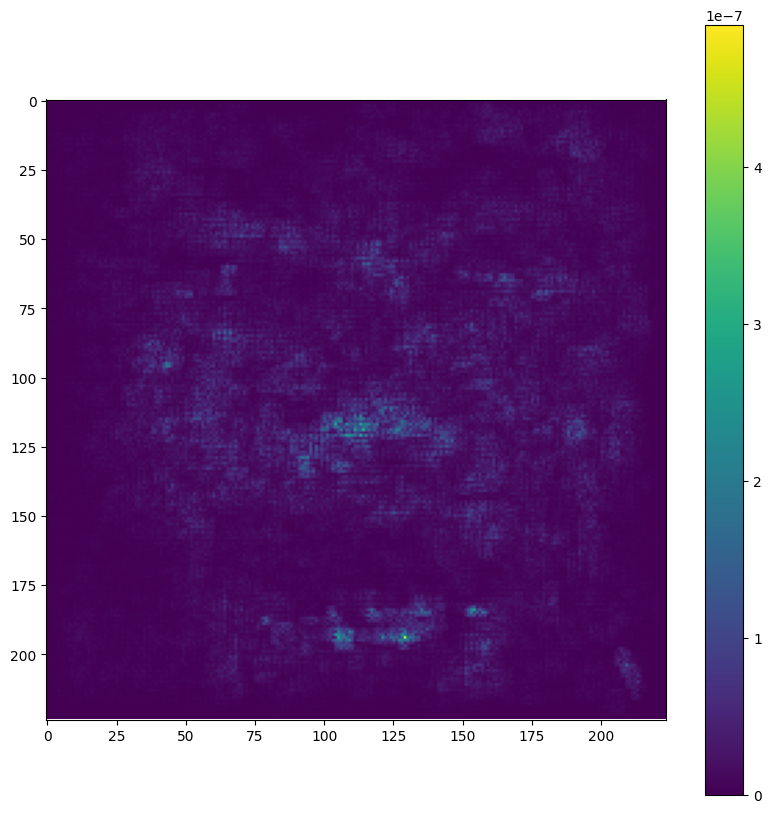

In [ ]:
if gradients is not None:
    # Compute the saliency map
    saliency_map = tf.reduce_max(tf.abs(gradients), axis=-1)
    saliency_map_numpy = saliency_map.numpy()


    # Plot the saliency map
    plt.figure(figsize=(10, 10))
    plt.imshow(saliency_map_numpy[0], cmap='viridis')
    # Use .numpy() to convert the TensorFlow tensor to a NumPy array for plotting
    #plt.imshow(saliency_map[0].numpy(), cmap='viridis')  # Assuming the batch size is 1
    plt.colorbar()
    plt.show()
else:
    print("Gradients could not be computed.")

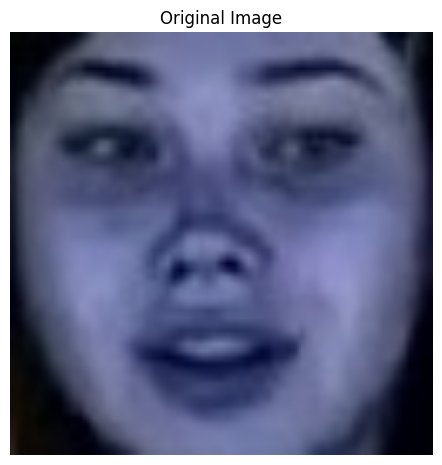

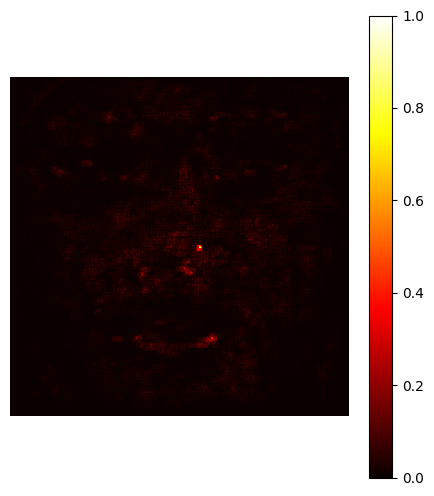

In [ ]:
if gradients is not None:
    # Normalize the gradients to be between 0 and 1
    gradients_rescaled = tf.math.abs(gradients)
    gradients_rescaled = (gradients_rescaled - tf.reduce_min(gradients_rescaled)) / \
                         (tf.reduce_max(gradients_rescaled) - tf.reduce_min(gradients_rescaled))

    # Compute the saliency map
    saliency_map = tf.reduce_max(gradients_rescaled, axis=-1)
    saliency_map_numpy = saliency_map.numpy()

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(np_data_X[16000])
    plt.title("Original Image")
    plt.axis('off')

    # Plot the saliency map
    #plt.figure(figsize=(10, 10))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    plt.imshow(saliency_map_numpy[0], cmap='hot')  # Changed colormap to 'hot'
    plt.axis('off')

    plt.colorbar()
    plt.show()
else:
    print("Gradients could not be computed.")

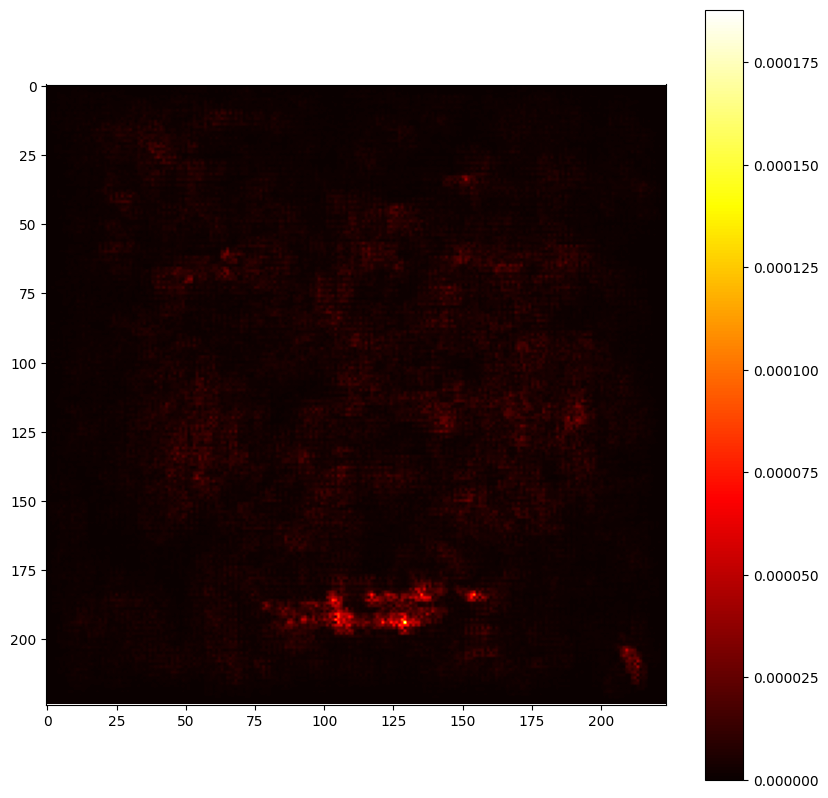

In [ ]:
import numpy as np

# Choose a baseline (e.g., a black image) and prepare it in the same way as your input image
baseline = np.zeros_like(image)
baseline_tensor = tf.convert_to_tensor(baseline, dtype=tf.float32)
baseline_tensor = tf.expand_dims(baseline_tensor, axis=0)

# Number of steps for the integrated gradients computation
steps = 100
# Initialize the integrated gradients tensor
integrated_gradients = tf.zeros_like(image_tensor)

for alpha in np.linspace(0, 1, steps):
    interpolated_image = baseline_tensor + alpha * (image_tensor - baseline_tensor)
    with tf.GradientTape() as tape:
        tape.watch(interpolated_image)
        predictions = model(interpolated_image)
        output_to_explain = predictions[:, class_idx]

    gradients = tape.gradient(output_to_explain, interpolated_image)
    integrated_gradients += gradients / steps

# Average across steps
saliency_map = tf.reduce_max(tf.abs(integrated_gradients), axis=-1)
saliency_map_smooth = tf.keras.layers.AveragePooling2D(pool_size=(5, 5), strides=1, padding='same')(saliency_map[..., tf.newaxis])

saliency_map_numpy = saliency_map.numpy()

# Plot the saliency map
plt.figure(figsize=(10, 10))
plt.imshow(saliency_map_numpy[0], cmap='hot')
plt.colorbar()
plt.show()


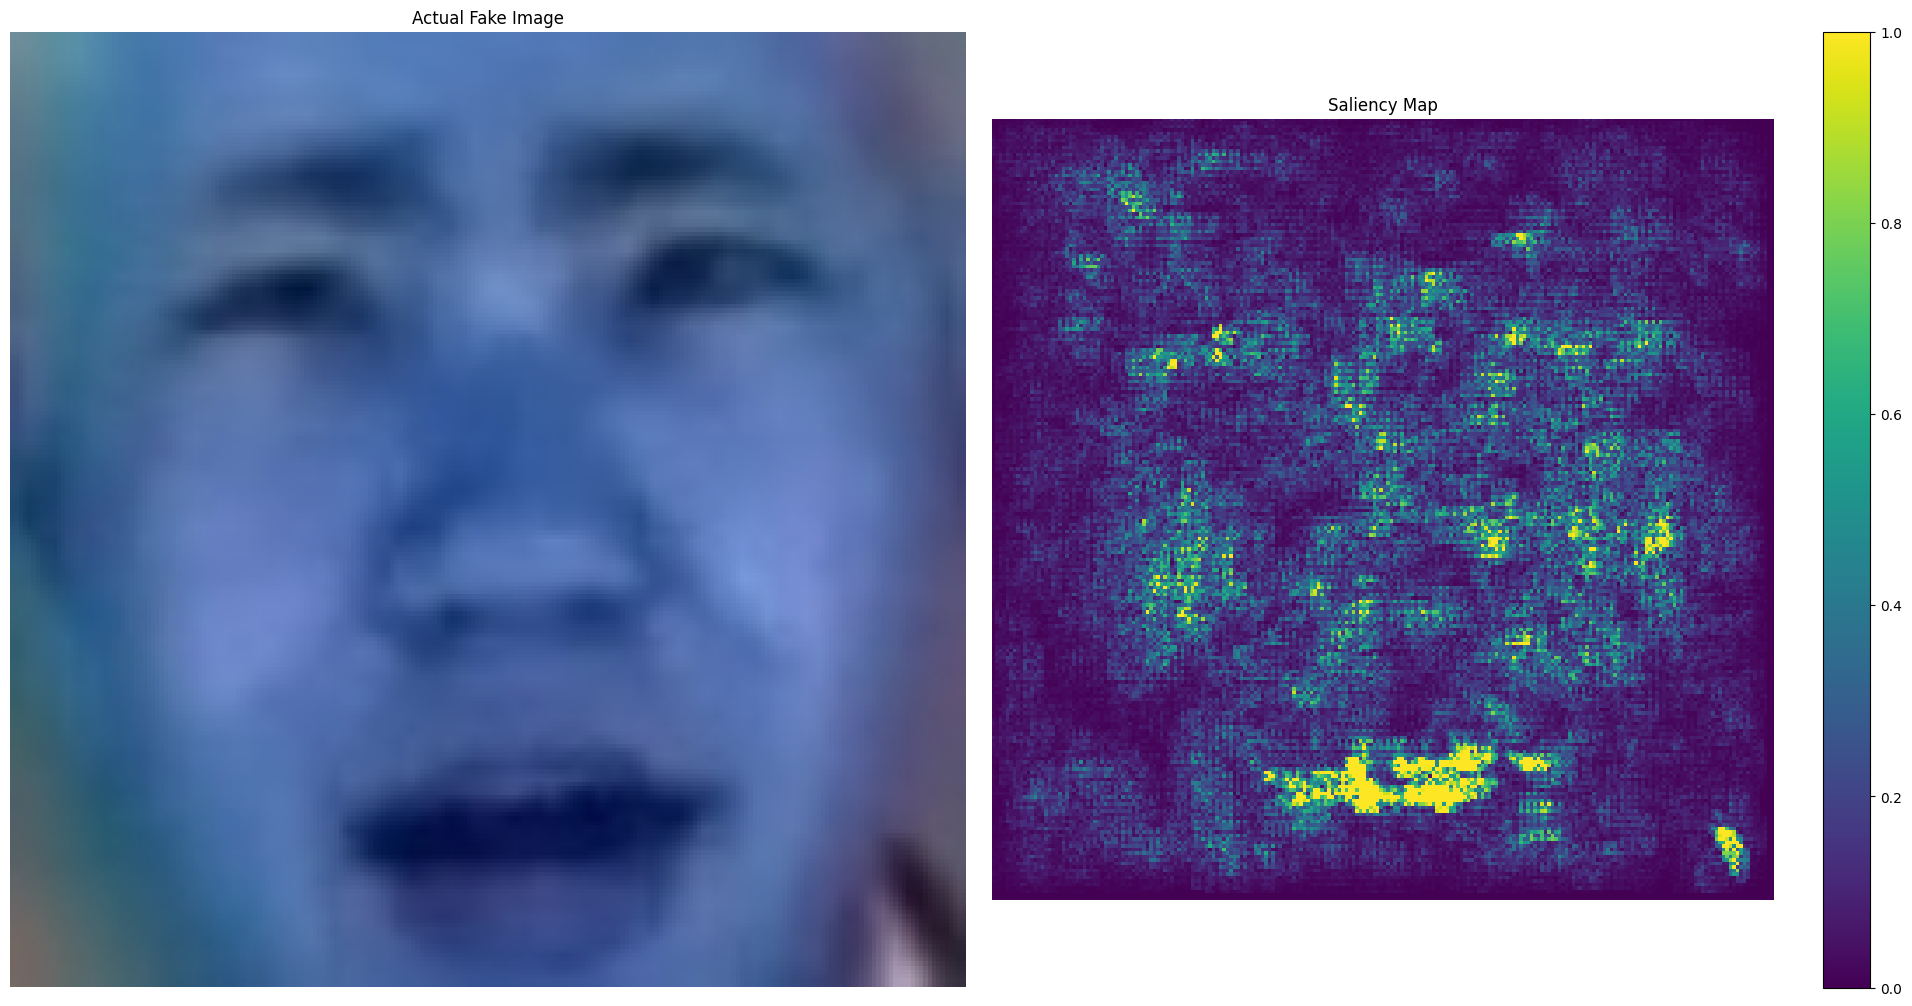

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming integrated_gradients has been computed as before
saliency_map = tf.reduce_max(tf.abs(integrated_gradients), axis=-1)

# Enhance contrast by clipping the top and bottom 1% of values
lower_bound = np.percentile(saliency_map, 1)
upper_bound = np.percentile(saliency_map, 99)
saliency_map_clipped = tf.clip_by_value(saliency_map, lower_bound, upper_bound)

# Normalize the clipped saliency map
saliency_map_normalized = (saliency_map_clipped - tf.reduce_min(saliency_map_clipped)) / \
                          (tf.reduce_max(saliency_map_clipped) - tf.reduce_min(saliency_map_clipped))

saliency_map_numpy = saliency_map_normalized.numpy()

# # Overlay the saliency map on the original image
# plt.figure(figsize=(15, 15))
# plt.imshow(np_data_X[16000], alpha=0.9)  # more opaque original
# plt.imshow(saliency_map_numpy[0], cmap='hot', alpha=0.5)  # semi-transparent saliency map
# plt.colorbar()
# plt.show()

# import numpy as np
# import matplotlib.pyplot as plt

# Assuming saliency_map_normalized is already computed
# saliency_map_numpy = saliency_map_normalized.numpy()

# Prepare the plot with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Adjust the figure size as needed

# Plot the original image
axes[0].imshow(np_data_X[14000])
axes[0].set_title("Actual Fake Image")
axes[0].axis('off')  # Hide axes

# Plot the saliency map
saliency_image = axes[1].imshow(saliency_map_numpy[0], cmap='viridis')
axes[1].set_title("Saliency Map")
axes[1].axis('off')  # Hide axes

# Add a colorbar for the saliency map
fig.colorbar(saliency_image, ax=axes[1], orientation='vertical')

plt.tight_layout()
plt.show()

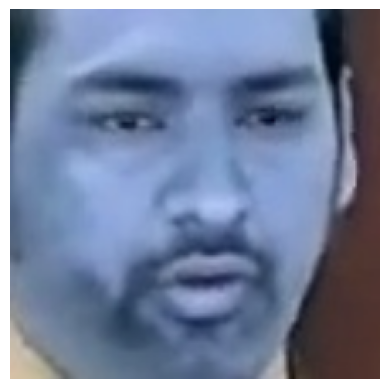

In [ ]:
plt.imshow(np_data_X[11119])
plt.axis('off')  # to turn off axis labels
plt.show()

In [ ]:
np_data_Y[1119]

0

In [ ]:
print("Eager execution:", tf.executing_eagerly())

Eager execution: True


In [ ]:
################## COUNTERFACTUAL EXPLANATION ##################

1/1 [==============================] - 0s 20ms/step


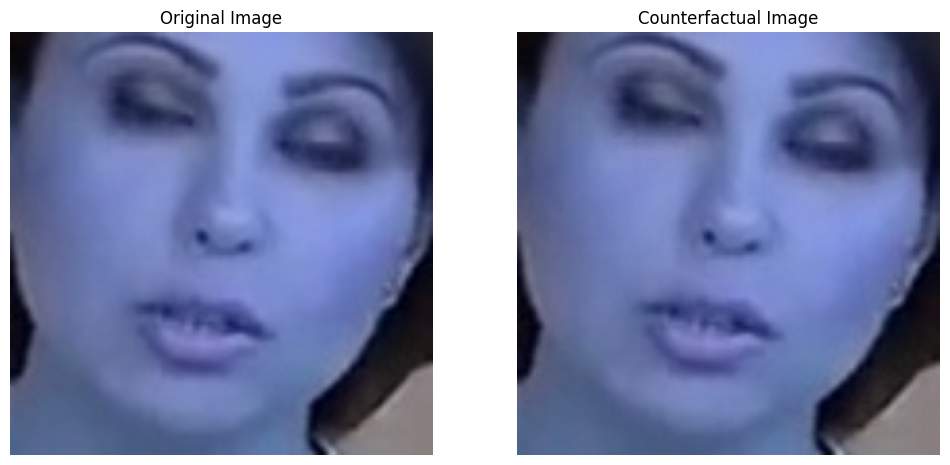

Step 0: Loss = [[0.00099624]]


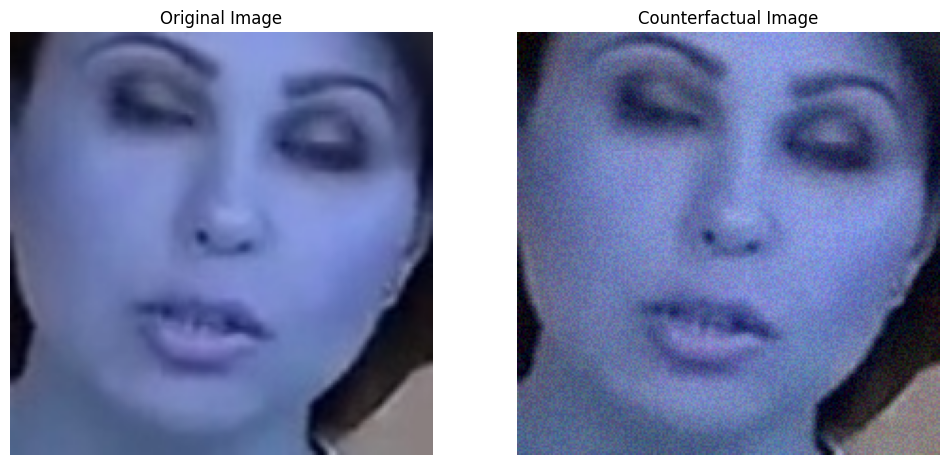

Step 1000: Loss = [[0.11690459]]


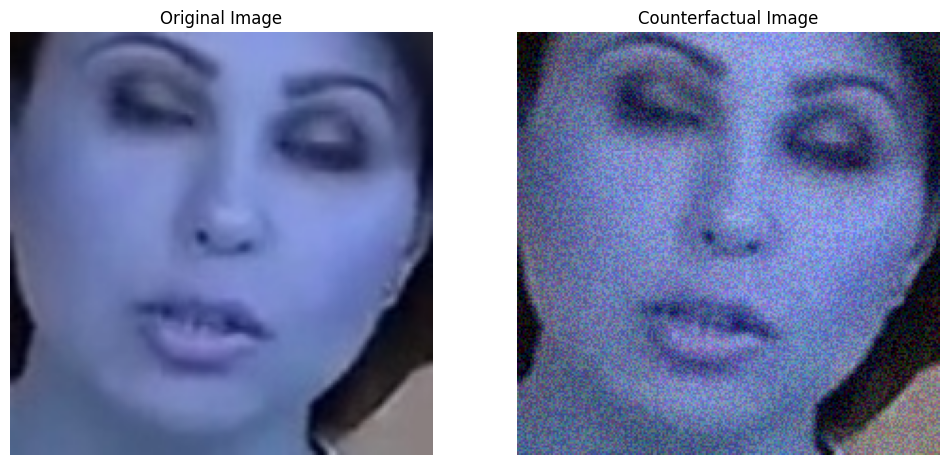

Step 2000: Loss = [[0.43276352]]
Original Prediction: [[0.0017354]]
1/1 [==============================] - 0s 25ms/step
Counterfactual Prediction: [[6.943042e-12]]


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

original_image = np_data_X[1001:1002]  # Use the first sample for demonstration
original_prediction = model.predict(original_image)

def counterfactual_loss(counterfactual_image):
    # Prediction difference loss: aiming for a different prediction than the original
    counterfactual_prediction = model(counterfactual_image)
    prediction_difference = tf.square(counterfactual_prediction - original_prediction)

    # Input difference loss: the counterfactual should be similar to the original image
    input_difference = tf.reduce_mean(tf.square(counterfactual_image - original_image))

    # Total loss: balance these terms as needed
    return prediction_difference + 0.001 * input_difference

# # Initialize counterfactual image as a copy of the original image
# noise = tf.random.normal(shape=original_image.shape, stddev= 1)
counterfactual_image = tf.Variable(original_image+noise, dtype=tf.float32)

# Optimization step
optimizer = tf.optimizers.Adam(learning_rate=0.01)
epsilon = 0.01

# Optimization loop
for step in range(3000):  # Increase the number of steps for finer optimization
    with tf.GradientTape() as tape:
        loss = counterfactual_loss(counterfactual_image)

    gradients = tape.gradient(loss, [counterfactual_image])
    perturbation = epsilon * tf.sign(gradients[0])
    counterfactual_image.assign_add(perturbation)
    #optimizer.apply_gradients(zip(gradients, [counterfactual_image]))


    if step % 1000 == 0:
        counterfactual_np = counterfactual_image.numpy()

        # Normalize the image if it's not already in the range [0, 1]
        if counterfactual_np.max() > 1.0:
            counterfactual_np = counterfactual_np / 255.0
        counterfactual_np = np.clip(counterfactual_np, 0, 1)

        # Display the original and counterfactual images
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(original_image[0])
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(counterfactual_np[0])
        plt.title("Counterfactual Image")
        plt.axis('off')

        plt.show()
        print(f"Step {step}: Loss = {loss.numpy()}")

# The counterfactual image is the result of the optimization
counterfactual = counterfactual_image.numpy()

# Display the original and counterfactual images
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.imshow(original_image[0])
# plt.title("Original Image")
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(counterfactual[0])
# plt.title("Counterfactual Image")
# plt.axis('off')

# plt.show()

# Compare the original and counterfactual predictions
print("Original Prediction:", original_prediction)
print("Counterfactual Prediction:", model.predict(counterfactual))

In [ ]:
counterfactual_np = counterfactual_image.numpy()

# Normalize the image if it's not already in the range [0, 1]
if counterfactual_np.max() > 1.0:
    counterfactual_np = counterfactual_np / 255.0
counterfactual_np = np.clip(counterfactual_np, 0, 1)

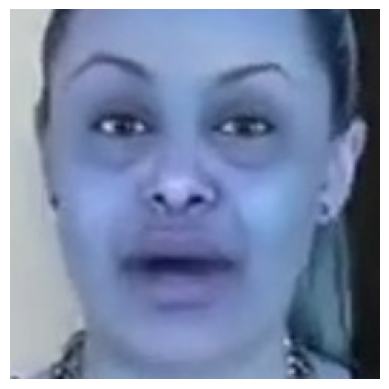

In [ ]:
plt.imshow(counterfactual_np[0])
plt.axis('off')  # to turn off axis labels
plt.show()

array([[[201, 206, 204],
        [201, 206, 204],
        [201, 206, 204],
        ...,
        [ 33,  29,  28],
        [ 33,  29,  28],
        [ 33,  29,  28]],

       [[201, 206, 204],
        [201, 206, 204],
        [201, 206, 204],
        ...,
        [ 33,  29,  28],
        [ 33,  29,  28],
        [ 33,  29,  28]],

       [[201, 206, 204],
        [201, 206, 204],
        [201, 206, 204],
        ...,
        [ 33,  29,  28],
        [ 33,  29,  28],
        [ 33,  29,  28]],

       ...,

       [[191, 195, 206],
        [189, 193, 204],
        [184, 188, 199],
        ...,
        [ 23,  24,  28],
        [ 24,  25,  29],
        [ 24,  25,  29]],

       [[162, 166, 177],
        [153, 157, 168],
        [139, 143, 154],
        ...,
        [ 24,  25,  30],
        [ 25,  26,  30],
        [ 25,  26,  30]],

       [[143, 147, 158],
        [130, 134, 145],
        [110, 115, 126],
        ...,
        [ 25,  25,  31],
        [ 25,  26,  31],
        [ 26,  27,  31]]], dtype=uint8)
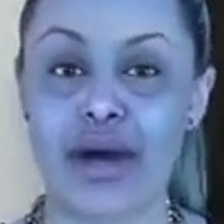

In [ ]:
original_image[0]

In [ ]:
counterfactual = counterfactual_image.numpy()
counterfactual[0]

array([[[200.7719  , 206.00298 , 204.0308  ],
        [200.98865 , 205.88335 , 203.88544 ],
        [200.90012 , 206.01205 , 204.04352 ],
        ...,
        [ 33.119293,  29.014952,  28.083342],
        [ 32.91038 ,  28.988405,  28.16989 ],
        [ 32.972435,  29.09047 ,  28.03356 ]],

       [[200.90195 , 206.08353 , 204.12599 ],
        [201.00143 , 205.99695 , 204.0402  ],
        [200.93839 , 205.9889  , 204.11568 ],
        ...,
        [ 32.98363 ,  28.966215,  28.018488],
        [ 33.04683 ,  28.963245,  27.94666 ],
        [ 33.03355 ,  29.081535,  28.058273]],

       [[201.10118 , 206.07053 , 203.95918 ],
        [201.1739  , 206.02557 , 204.10495 ],
        [201.07759 , 206.10924 , 204.0684  ],
        ...,
        [ 32.888954,  29.05101 ,  27.880796],
        [ 33.082127,  28.94884 ,  27.805843],
        [ 32.89466 ,  28.864704,  28.065092]],

       ...,

       [[191.0372  , 195.10046 , 205.92332 ],
        [188.98837 , 192.93633 , 203.96486 ],
        [184.047   , 1

In [ ]:
import tensorflow as tf

def lrp_cnn(model, input_data):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(input_data)
        activations = [input_data]
        x = input_data

        for layer in model.layers:
            x = layer(x)
            activations.append(x)
            tape.watch(x)

        relevance = activations[-1]

    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        activation = activations[i]
        prev_activation = activations[i - 1] if i > 0 else input_data

        with tape:
            if activation is not None:
                tape.watch(activation)
                grad = tape.gradient(relevance, activation, unconnected_gradients=tf.UnconnectedGradients.ZERO)
                if grad is not None:
                    if isinstance(layer, tf.keras.layers.Conv2D):
                        # Compute a relevance map for convolutional layers using transposed convolution,
                        # which acts as a 'reverse' of the forward operation
                        filters = layer.weights[0]
                        # Apply transposed convolution to the gradient to map back to the input size of the layer
                        relevance = tf.nn.conv2d_transpose(grad, filters, output_shape=prev_activation.shape, strides=layer.strides, padding=layer.padding)
                    elif isinstance(layer, tf.keras.layers.Dense):
                        # For Dense layers, multiply the gradient by the layer's weights
                        weights = layer.weights[0]
                        relevance = tf.matmul(grad, tf.transpose(weights))

    # The final relevance should match the input size
    assert relevance.shape == input_data.shape, "Relevance score does not match input shape"

    return relevance.numpy()

In [ ]:
image = np_data_X[11119]
image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
image_tensor = tf.expand_dims(image_tensor, axis=0)
relevance_scores = lrp_cnn(model, image_tensor)

TypeError: Invalid shape (512,) for image data

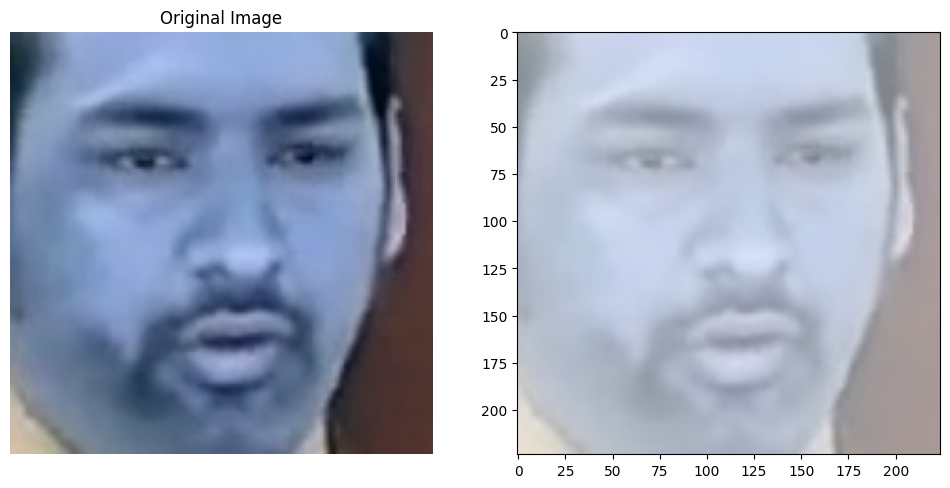

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming relevance_scores is the output from your LRP function
# Process the relevance scores if necessary (e.g., squeezing, summing across channels)
relevance_scores_processed = np.squeeze(relevance_scores)  # Remove the channel dimension if it's 1

# Normalize the relevance scores for better visualization
relevance_scores_processed -= relevance_scores_processed.min()
relevance_scores_processed /= max(relevance_scores_processed.max(), 1e-8)  # Avoid division by zero

# Assuming input_data is your input image
input_image = np.squeeze(np_data_X[11119])  # Remove singleton dimensions

plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')  # Use grayscale color map
plt.title('Original Image')
plt.axis('off')

# Display the heatmap
plt.subplot(1, 2, 2)
plt.imshow(input_image, cmap='gray', alpha=0.5)  # Show the grayscale image
plt.imshow(relevance_scores_processed, cmap='hot', alpha=0.5)  # Overlay the heatmap
plt.title('LRP Heatmap')
plt.axis('off')

plt.show()

In [ ]:
pip install innvestigate

In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.14.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, innvestigate, tf_keras


In [ ]:
import innvestigate
import numpy as np


analyzer = innvestigate.create_analyzer("gradient", model)

# Assuming 'model' is your Keras model
# Create a new model without the softmax layer
# model_wo_softmax = innvestigate.utils.keras.graph.model_wo_softmax(model)

# Create an analyzer for LRP
# analyzer = innvestigate.create_analyzer("lrp.z", model_wo_softmax)

# Assuming you have an input image 'img' to analyze
# Preprocess the image here (e.g., scaling, expanding dimensions) as necessary
# img = preprocess(img)

# Analyze the image and get the relevance map
# relevance_map = analyzer.analyze(np_data_X[14000])

# Postprocess the relevance map if needed and visualize
# This is just an example, actual visualization will depend on your data and requirements
# relevance_map_processed = postprocess(relevance_map)
# visualize(relevance_map_processed)


In [ ]:
# analysis = analyzer.analyze(np_data_X[14000])